In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import geopandas as gpd

## language data (demographic factor)

In [106]:
demographic_factor_df = pd.read_csv('data/CensusBGGEO_2020_-8839192176228303427.csv')
call_data_df = pd.read_csv('data/Call_Data_20240712.csv')

In [5]:
census_dict = pd.read_csv('data/race_in_combination_transpose_Neighborhoods_-4641204050997988934.csv')

In [104]:
census_dict['Neighborhood Name'].unique()

array(['Eastlake', '23rd & Union-Jackson', 'North Beacon Hill',
       'Columbia City', 'Admiral', 'Bitter Lake Village', 'Othello',
       'Westwood-Highland Park', 'South Park', 'Madison-Miller',
       'Lake City', 'Roosevelt', 'Wallingford', 'Rainier Beach',
       'West Seattle Junction', 'Morgan Junction', 'Green Lake',
       'Northgate', 'Fremont', 'Ballard', 'Mt Baker', 'South Lake Union',
       'University District', 'Uptown', 'Downtown',
       'First Hill/Capitol Hill', 'Greater Duwamish',
       'Council District 1', 'Council District 2', 'Council District 3',
       'Council District 4', 'Council District 5', 'Council District 6',
       'Council District 7', 'Arbor Heights', 'Fauntleroy/Seaview',
       'West Seattle Junction/Genesee Hill', 'Alki/Admiral',
       'North Delridge', 'High Point', 'Riverview', 'Roxhill/Westwood',
       'Highland Park', 'Georgetown', 'Duwamish/SODO',
       'South Beacon Hill/NewHolly', 'Beacon Hill',
       'North Beacon Hill/Jefferson Pa

In [140]:
demographic_factor_df

,OBJECTID,GEOID_20,Land Acres,Water Acres,Census Tract Number,Census Block Group,Census Tract and Block Group,Block Group Name,Census Tract Label,Council District,...,Neighborhood Subtype,Council District Type,Urban Center Village Type,"Earnings $50,000 or More Male Workers","Earnings $50,000 or More Female Workers",Population 16 years and over with earnings,Males 16 years and over with earnings,Females 16 years and over with earnings,Shape__Area,Shape__Length
0,1,530330105022,93.418437,0.000000,10502,2,10502.2,Block Group 2,105.02,1,...,Outside Villages,CD,UCUV,524,427,1403,737,666,4.069196e+06,9132.543011
1,2,530330106023,74.934707,0.000000,10602,3,10602.3,Block Group 3,106.02,1,...,Outside Villages,CD,UCUV,296,294,955,543,412,3.264104e+06,7252.175209
2,3,530330107012,98.666214,0.000000,10701,2,10701.2,Block Group 2,107.01,1,...,Outside Villages,CD,UCUV,192,167,612,335,277,4.297807e+06,11496.354128
3,4,530330111021,160.180380,282.550178,11102,1,11102.1,Block Group 1,111.02,2,...,Outside Villages,CD,UCUV,288,280,845,391,454,6.948791e+06,16141.467904
4,5,530330111023,29.226142,0.000000,11102,3,11102.3,Block Group 3,111.02,2,...,Outside Villages,CD,UCUV,84,139,621,313,308,1.273065e+06,5191.317410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,532,530330099002,252.569376,0.000000,9900,2,9900.2,Block Group 2,99.00,1,...,Hub Urban Village,CD,UCUV,294,295,980,529,451,1.100165e+07,15164.202043
532,533,530330101021,225.914860,536.234740,10102,1,10102.1,Block Group 1,101.02,2,...,Outside Villages,CD,UCUV,547,247,1257,841,416,9.679086e+06,15012.599688
533,534,530330102001,161.919014,33.377018,10200,1,10200.1,Block Group 1,102.00,2,...,Outside Villages,CD,UCUV,502,398,1237,676,561,7.175143e+06,11703.572057
534,535,530330102003,79.141923,0.000000,10200,3,10200.3,Block Group 3,102.00,2,...,Outside Villages,CD,UCUV,301,202,807,465,342,3.447346e+06,8906.442678


In [7]:
census_dict[census_dict['Neighborhood Name'] == 'Beacon Hill']

,OBJECTID,NEIGH_NO,Neighborhood Name,Neighborhood Type,Neighborhood Subtype,ACS Vintage,Race,Population,Race Combination,Neighborhood Type (outside comp plan areas id)
47,48,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,White,2969,All,CRA
139,140,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,Black or African American,1348,All,CRA
231,232,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,American Indian and Alaska Native,373,All,CRA
323,324,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,Asian,4894,All,CRA
415,416,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,Native Hawaiian and Other Pacific Islander,3,All,CRA
507,508,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,Some Other Race,715,All,CRA
599,600,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,White,2301,Alone,CRA
691,692,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,Black or African American,1002,Alone,CRA
783,784,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,American Indian and Alaska Native,156,Alone,CRA
875,876,3.5,Beacon Hill,CRA,Greater Duwamish,5Y22,Asian,4504,Alone,CRA


In [8]:
race_dict = pd.read_csv('data/race_ethnicity_Neighborhoods_-7085838689260358328.csv')

In [9]:
race_dict

,OBJECTID,Neighborhood Name,Neighborhood Type,Neighborhood Subtype,ACS Vintage,Total Population,White Alone Not Hispanic or Latino,Black or African American Alone Not Hispanic or Latino,American Indian and Alaska Native Alone Not Hispanic or Latino,Asian Alone Not Hispanic or Latino,...,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Percent Persons of Color,NEIGH_NO,Neighborhood Type (outside comp plan areas id)
0,1,Eastlake,UCUV,Residential Urban Village,5Y22,5916,4362,163,14,694,...,4383,163,14,740,0,114,502,26.3,107.0,UCUV
1,2,23rd & Union-Jackson,UCUV,Residential Urban Village,5Y22,15866,7473,2690,69,2459,...,7944,2723,85,2463,58,700,1893,52.9,109.0,UCUV
2,3,North Beacon Hill,UCUV,Residential Urban Village,5Y22,7199,3157,477,25,1723,...,3394,491,33,1758,148,578,797,56.1,110.0,UCUV
3,4,Columbia City,UCUV,Residential Urban Village,5Y22,8131,3559,1992,21,1479,...,3666,2005,21,1479,0,399,561,56.2,111.0,UCUV
4,5,Admiral,UCUV,Residential Urban Village,5Y22,2761,2309,0,0,144,...,2333,0,0,144,2,2,280,16.4,113.0,UCUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,Outside Villages,UCUV,Outside Villages,5Y22,404739,273478,20563,1197,52569,...,282225,21004,1814,53003,587,8767,37339,32.4,0.0,UCUV-OUT
88,89,Aurora-Licton Springs,UCUV,Residential Urban Village,5Y22,8091,4581,397,185,1458,...,4918,415,197,1472,89,417,583,43.4,101.0,UCUV
89,90,Greenwood-Phinney Ridge,UCUV,Residential Urban Village,5Y22,3171,2144,186,0,240,...,2208,186,0,254,0,81,442,32.4,102.0,UCUV
90,91,Crown Hill,UCUV,Residential Urban Village,5Y22,4699,3814,24,0,243,...,3829,24,0,243,0,202,401,18.8,103.0,UCUV


In [10]:
demographic_factor_df = demographic_factor_df.dropna()

In [11]:
demographic_factor_df['Census Tract Label'] = demographic_factor_df['Census Tract Label'].astype(str)
demographic_factor_df['Census_Tract_Label'] = demographic_factor_df['Census Tract Label'].str.split('.').str[0]

In [12]:
columns_to_keep = [ 'Census_Tract_Label',
    'Population Speaks a Language Other than English',
    'Population Speaks English Less than Very Well',
    'Households with Limited English',
    'Spanish Limited English Speaking Households',
    'Other Indo-European Languages Limited English Speaking Households',
    'Asian and Pacific Island Languages Limited English Speaking Households',
    'Other Languages Limited English Speaking Households'
]
# Drop columns that are not in the list 'columns_to_keep'
demographic_factor_df = demographic_factor_df[columns_to_keep]

In [13]:
demographic_factor_df.columns.tolist()

['Census_Tract_Label',
 'Population Speaks a Language Other than English',
 'Population Speaks English Less than Very Well',
 'Households with Limited English',
 'Spanish Limited English Speaking Households',
 'Other Indo-European Languages Limited English Speaking Households',
 'Asian and Pacific Island Languages Limited English Speaking Households',
 'Other Languages Limited English Speaking Households']

## Race and Ethnicity 

In [14]:
# Drop the specified columns
#race_dict = race_dict.drop(columns=['Neighborhood Type (outside comp plan areas id)', 'OBJECTID', 'ACS Vintage'])
race_dict = race_dict.drop(columns=['Neighborhood Type'])

In [15]:
race_dict['NEIGH_NO'] = race_dict['NEIGH_NO'].astype(str)
race_dict['Census_Tract_Label'] = race_dict['NEIGH_NO'].str.split('.').str[0]

In [16]:
race_dict = race_dict.drop(columns=['NEIGH_NO'])

In [17]:
race_dict

,OBJECTID,Neighborhood Name,Neighborhood Subtype,ACS Vintage,Total Population,White Alone Not Hispanic or Latino,Black or African American Alone Not Hispanic or Latino,American Indian and Alaska Native Alone Not Hispanic or Latino,Asian Alone Not Hispanic or Latino,Native Hawaiian and Other Pacific Islander Alone Not Hispanic or Latino,...,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Percent Persons of Color,Neighborhood Type (outside comp plan areas id),Census_Tract_Label
0,1,Eastlake,Residential Urban Village,5Y22,5916,4362,163,14,694,0,...,4383,163,14,740,0,114,502,26.3,UCUV,107
1,2,23rd & Union-Jackson,Residential Urban Village,5Y22,15866,7473,2690,69,2459,52,...,7944,2723,85,2463,58,700,1893,52.9,UCUV,109
2,3,North Beacon Hill,Residential Urban Village,5Y22,7199,3157,477,25,1723,148,...,3394,491,33,1758,148,578,797,56.1,UCUV,110
3,4,Columbia City,Residential Urban Village,5Y22,8131,3559,1992,21,1479,0,...,3666,2005,21,1479,0,399,561,56.2,UCUV,111
4,5,Admiral,Residential Urban Village,5Y22,2761,2309,0,0,144,2,...,2333,0,0,144,2,2,280,16.4,UCUV,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,Outside Villages,Outside Villages,5Y22,404739,273478,20563,1197,52569,575,...,282225,21004,1814,53003,587,8767,37339,32.4,UCUV-OUT,0
88,89,Aurora-Licton Springs,Residential Urban Village,5Y22,8091,4581,397,185,1458,89,...,4918,415,197,1472,89,417,583,43.4,UCUV,101
89,90,Greenwood-Phinney Ridge,Residential Urban Village,5Y22,3171,2144,186,0,240,0,...,2208,186,0,254,0,81,442,32.4,UCUV,102
90,91,Crown Hill,Residential Urban Village,5Y22,4699,3814,24,0,243,0,...,3829,24,0,243,0,202,401,18.8,UCUV,103


## diff_language_census merging

In [18]:
census_dict['NEIGH_NO'] = census_dict['NEIGH_NO'].astype(str)
census_dict['Census_Tract_Label'] = census_dict['NEIGH_NO'].str.split('.').str[0]

In [19]:
census_dict[census_dict['Neighborhood Name'] == 'North Beacon Hill']

,OBJECTID,NEIGH_NO,Neighborhood Name,Neighborhood Type,Neighborhood Subtype,ACS Vintage,Race,Population,Race Combination,Neighborhood Type (outside comp plan areas id),Census_Tract_Label
2,3,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,White,4081,All,UCUV,110
94,95,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,Black or African American,716,All,UCUV,110
186,187,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,American Indian and Alaska Native,243,All,UCUV,110
278,279,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,Asian,2189,All,UCUV,110
370,371,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,Native Hawaiian and Other Pacific Islander,289,All,UCUV,110
462,463,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,Some Other Race,662,All,UCUV,110
554,555,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,White,3394,Alone,UCUV,110
646,647,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,Black or African American,491,Alone,UCUV,110
738,739,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,American Indian and Alaska Native,33,Alone,UCUV,110
830,831,110.0,North Beacon Hill,UCUV,Residential Urban Village,5Y22,Asian,1758,Alone,UCUV,110


In [20]:
diff_language_census = census_dict.merge(demographic_factor_df, on='Census_Tract_Label')
diff_language_census = diff_language_census.dropna()

In [21]:
diff_language_census['Race'].unique()

array(['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'Two or More Races'], dtype=object)

In [22]:
# Filter for specific races
races_of_interest = ['White', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
language_native = diff_language_census[diff_language_census['Race'].isin(races_of_interest)]

# Select relevant columns
language_native = language_native[['Neighborhood Name', 'Race', 'Population']]

# Group by Neighborhood Name and sum Population
language_native = language_native.groupby('Neighborhood Name')['Population'].sum().reset_index()
language_native

,Neighborhood Name,Population
0,23rd & Union-Jackson,54776
1,Admiral,27920
2,Alki/Admiral,131880
3,Arbor Heights,71172
4,Aurora-Licton Springs,77952
...,...,...
57,Upper Queen Anne,51000
58,Wallingford,61112
59,Wedgwood/View Ridge,118688
60,West Seattle Junction/Genesee Hill,277488


In [23]:
# Assuming your dataframe is named df
# Population Distribution by Race
race_population = diff_language_census.groupby('Race')['Population'].sum().reset_index()
race_population

,Race,Population
0,American Indian and Alaska Native,167220
1,Asian,1352456
2,Black or African American,682728
3,Native Hawaiian and Other Pacific Islander,55544
4,Some Other Race,367250
5,Two or More Races,319765
6,White,4750064


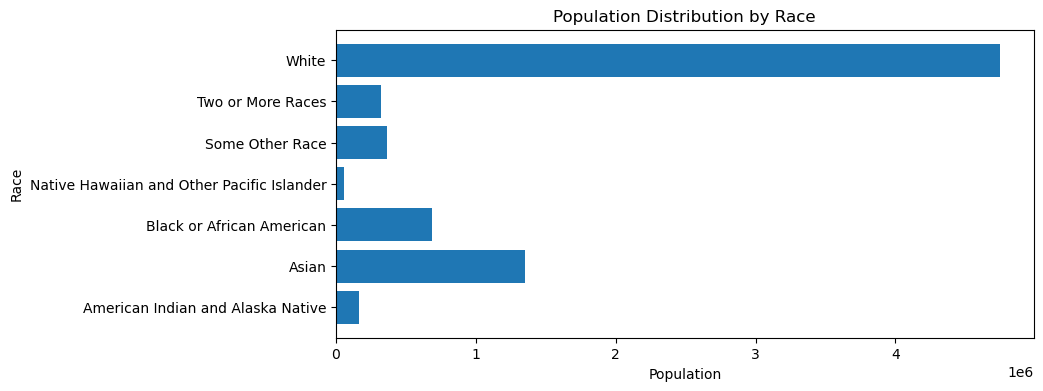

In [24]:
# Population Distribution by Race
plt.figure(figsize=(9, 4))
plt.barh(race_population['Race'], race_population['Population'])
plt.ylabel('Race')
plt.xlabel('Population')
plt.title('Population Distribution by Race')
plt.show()

In [25]:
diff_language_census

,OBJECTID,NEIGH_NO,Neighborhood Name,Neighborhood Type,Neighborhood Subtype,ACS Vintage,Race,Population,Race Combination,Neighborhood Type (outside comp plan areas id),Census_Tract_Label,Population Speaks a Language Other than English,Population Speaks English Less than Very Well,Households with Limited English,Spanish Limited English Speaking Households,Other Indo-European Languages Limited English Speaking Households,Asian and Pacific Island Languages Limited English Speaking Households,Other Languages Limited English Speaking Households
0,1,107.0,Eastlake,UCUV,Residential Urban Village,5Y22,White,4852,All,UCUV,107,286,130,18,0,0,18,0
1,1,107.0,Eastlake,UCUV,Residential Urban Village,5Y22,White,4852,All,UCUV,107,253,159,70,9,0,0,61
2,1,107.0,Eastlake,UCUV,Residential Urban Village,5Y22,White,4852,All,UCUV,107,381,132,17,0,0,17,0
3,1,107.0,Eastlake,UCUV,Residential Urban Village,5Y22,White,4852,All,UCUV,107,228,95,10,0,0,10,0
4,1,107.0,Eastlake,UCUV,Residential Urban Village,5Y22,White,4852,All,UCUV,107,1223,439,76,0,0,15,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790,1748,106.0,Upper Queen Anne,UCUV,Residential Urban Village,5Y22,Some Other Race,202,Multi-Race,UCUV,106,218,0,0,0,0,0,0
5791,1748,106.0,Upper Queen Anne,UCUV,Residential Urban Village,5Y22,Some Other Race,202,Multi-Race,UCUV,106,184,78,0,0,0,0,0
5792,1748,106.0,Upper Queen Anne,UCUV,Residential Urban Village,5Y22,Some Other Race,202,Multi-Race,UCUV,106,107,42,26,0,13,13,0
5793,1748,106.0,Upper Queen Anne,UCUV,Residential Urban Village,5Y22,Some Other Race,202,Multi-Race,UCUV,106,126,8,0,0,0,0,0


In [26]:
race_percentage = diff_language_census.groupby(['Neighborhood Name', 'Race'])['Population'].sum().unstack().fillna(0)
race_percentage['Total'] = race_percentage.sum(axis=1)

In [27]:
race_percentage

Race,American Indian and Alaska Native,Asian,Black or African American,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,White,Total
Neighborhood Name,,,,,,,,
23rd & Union-Jackson,1732,12736,14664,544,4052,3786,37836,75350
Admiral,1470,2140,300,20,490,1400,26130,31950
Alki/Admiral,1464,13596,8928,24,4896,4434,121464,154806
Arbor Heights,1188,6456,1356,60,2268,2820,68568,82716
Aurora-Licton Springs,4104,20928,6672,2076,6192,3498,65100,108570
...,...,...,...,...,...,...,...,...
Upper Queen Anne,1908,9108,3600,0,2880,2460,45492,65448
Wallingford,632,18188,3156,564,4496,4068,56760,87864
Wedgwood/View Ridge,1928,29216,2680,520,4584,6824,113560,159312


In [28]:
for column in race_percentage.columns[0:-1]:  
    race_percentage[column] = (race_percentage[column] / race_percentage['Total']) * 100
print(race_percentage)

Race                                American Indian and Alaska Native  \
Neighborhood Name                                                       
23rd & Union-Jackson                                         2.298607   
Admiral                                                      4.600939   
Alki/Admiral                                                 0.945700   
Arbor Heights                                                1.436240   
Aurora-Licton Springs                                        3.780050   
...                                                               ...   
Upper Queen Anne                                             2.915292   
Wallingford                                                  0.719293   
Wedgwood/View Ridge                                          1.210204   
West Seattle Junction/Genesee Hill                           1.947646   
Whittier Heights                                             1.092929   

Race                                    Asian  Bla

In [29]:
race_percentage = race_percentage.reset_index()

In [30]:
race_percentage['Neighborhood Name'].unique()

array(['23rd & Union-Jackson', 'Admiral', 'Alki/Admiral', 'Arbor Heights',
       'Aurora-Licton Springs', 'Ballard', 'Beacon Hill', 'Belltown',
       'Bitter Lake Village', 'Broadview/Bitter Lake', 'Capitol Hill',
       'Cascade/Eastlake', 'Cedar Park/Meadowbrook',
       'Central Area/Squire Park', 'Columbia City', 'Crown Hill',
       'Downtown Commercial Core', 'Duwamish/SODO', 'Eastlake',
       'Fauntleroy/Seaview', 'First Hill', 'Fremont', 'Georgetown',
       'Green Lake', 'Greenwood-Phinney Ridge', 'Greenwood/Phinney Ridge',
       'Haller Lake', 'High Point', 'Highland Park', 'Interbay',
       'Judkins Park', 'Laurelhurst/Sand Point', 'Licton Springs',
       'Madison Park', 'Madrona/Leschi', 'Magnolia', 'Miller Park',
       'Montlake/Portage Bay', 'Mt. Baker/North Rainier',
       'North Beach/Blue Ridge', 'North Beacon Hill',
       'North Beacon Hill/Jefferson Park', 'North Capitol Hill',
       'North Delridge', 'Northgate/Maple Leaf',
       'Olympic Hills/Victory He

In [31]:
race_percentage.to_csv('race_percentage.csv')

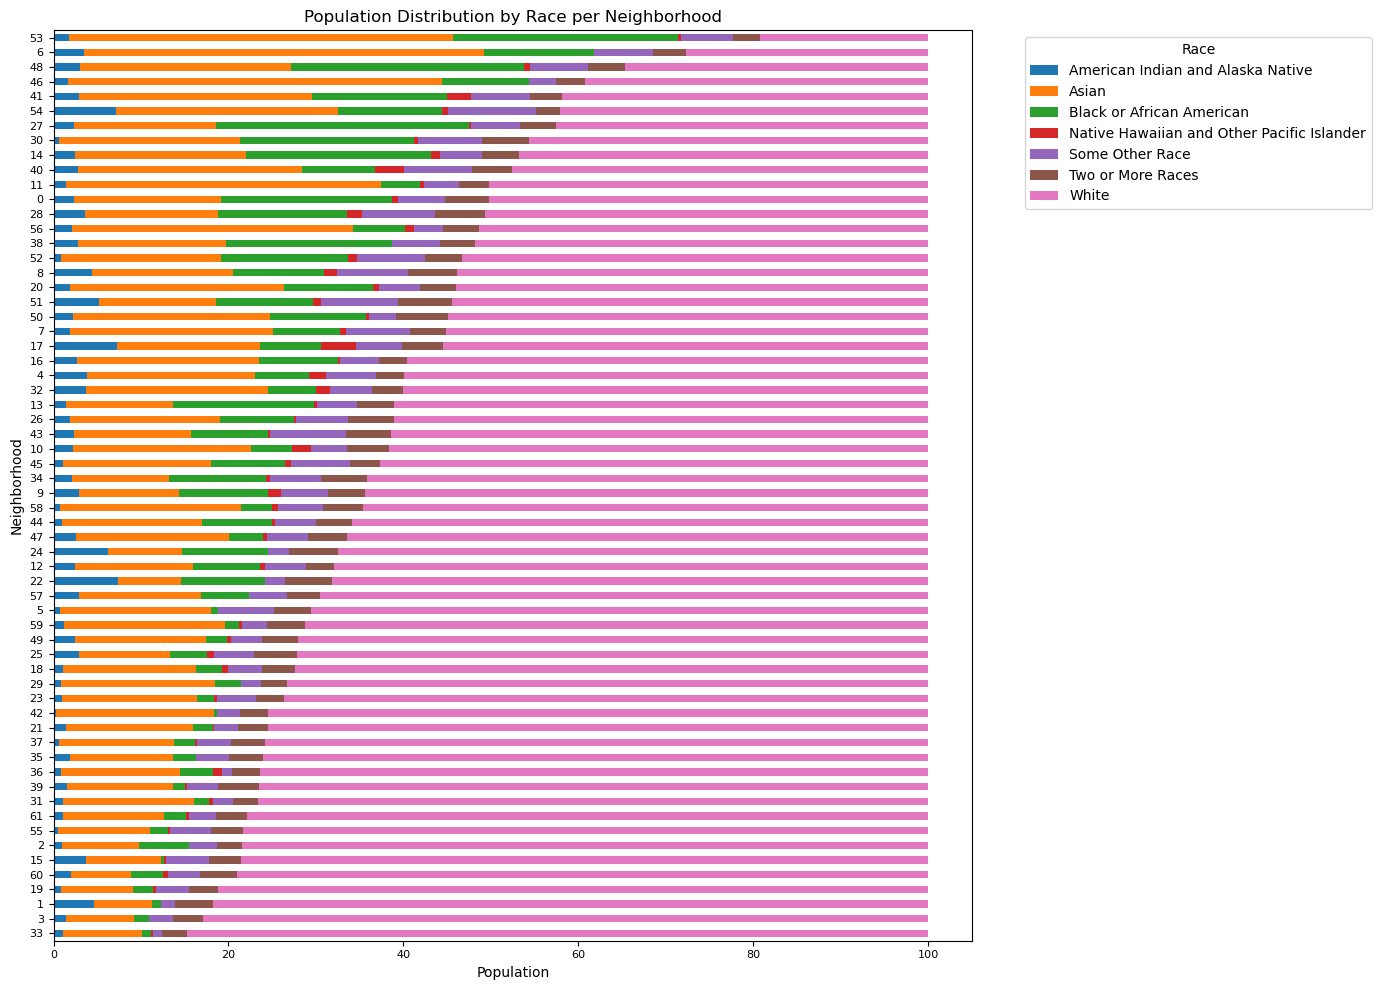

In [32]:
# Save the DataFrame with percentages to a variable
df_percentages = race_percentage.drop(columns='Total')

# Sorting the neighborhoods by the percentage of the white population in descending order
df_percentages_sorted = df_percentages.sort_values(by='White', ascending=False)

# Plotting population distribution by race per neighborhood
df_percentages_sorted.plot(kind='barh', stacked=True, figsize=(14, 10))

plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('Population Distribution by Race per Neighborhood')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust font size of x-axis labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


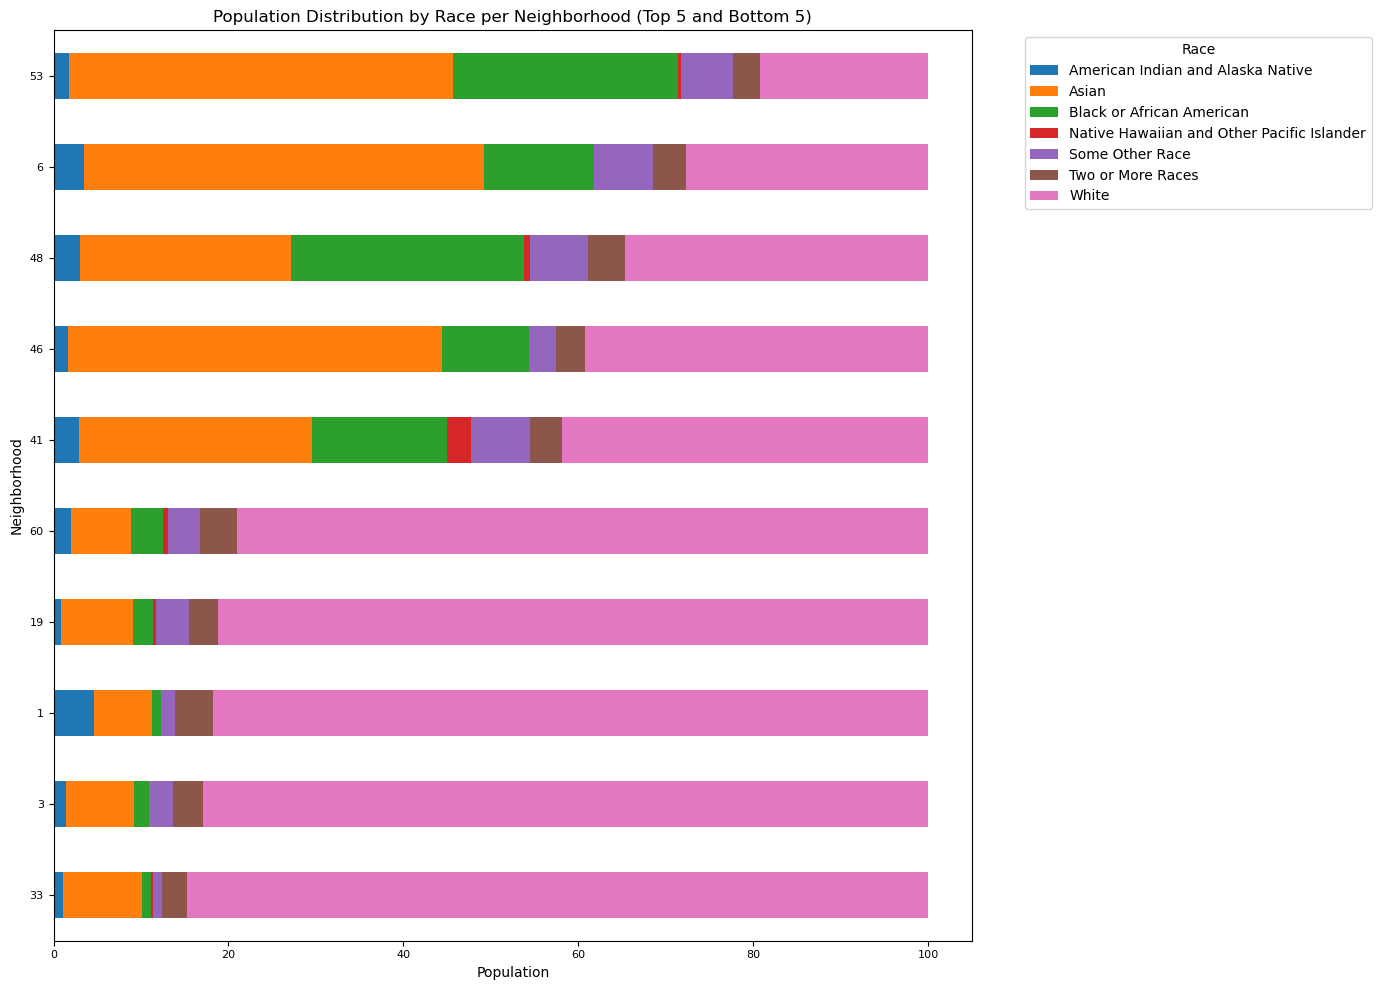

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'race_percentage' DataFrame is already defined
df_percentages = race_percentage.drop(columns='Total')

# Sorting the neighborhoods by the percentage of the white population in descending order
df_percentages_sorted = df_percentages.sort_values(by='White', ascending=False)

# Selecting the top 5 and bottom 5 neighborhoods
top_five = df_percentages_sorted.head(5)
bottom_five = df_percentages_sorted.tail(5)

# Concatenating top and bottom neighborhoods
df_top_bottom = pd.concat([top_five, bottom_five])

# Plotting population distribution by race per neighborhood
df_top_bottom.plot(kind='barh', stacked=True, figsize=(14, 10))

plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('Population Distribution by Race per Neighborhood (Top 5 and Bottom 5)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust font size of x-axis labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
#grouped_reset = grouped.reset_index()

In [ ]:
# List of neighborhoods to filter
neighborhoods_to_filter = ['South Beacon Hill/NewHolly', 'Rainier Beach', 'Pioneer Square/International District', 
                           'Chinatown', 'South Park', 'High Point']

# Filter the DataFrame to include only the specified neighborhoods
top_five_neighborhood_race = grouped_reset[grouped_reset['Neighborhood Name'].isin(neighborhoods_to_filter)]

In [ ]:
top_five_neighborhood_race.to_csv('top_five_neighborhood_race.csv')

In [ ]:
top_five_neighborhood_race

Race,Neighborhood Name,American Indian and Alaska Native,Asian,Black or African American,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,White,Total
27,High Point,2988,20532,36792,300,7068,5250,53964,126894
46,Pioneer Square/International District,666,16782,3906,6,1200,1284,15438,39282
48,Rainier Beach,10080,78786,87372,2250,21744,14022,113778,328032
53,South Beacon Hill/NewHolly,1268,30556,17900,244,4152,2174,13392,69686
54,South Park,1228,4396,2060,120,1728,486,7280,17298


In [ ]:
top_five_neighborhood_race.set_index('Neighborhood Name', inplace=True)
top_five_neighborhood_race[races].plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xlabel('Neighborhoods')
plt.ylabel('Population')
plt.title('Stacked Bar Chart of Racial Demographics by Neighborhood')
plt.legend(title='Races')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
grouped_reset['Neighborhood Name'].unique()

array(['23rd & Union-Jackson', 'Admiral', 'Alki/Admiral', 'Arbor Heights',
       'Aurora-Licton Springs', 'Ballard', 'Beacon Hill', 'Belltown',
       'Bitter Lake Village', 'Broadview/Bitter Lake', 'Capitol Hill',
       'Cascade/Eastlake', 'Cedar Park/Meadowbrook',
       'Central Area/Squire Park', 'Columbia City', 'Crown Hill',
       'Downtown Commercial Core', 'Duwamish/SODO', 'Eastlake',
       'Fauntleroy/Seaview', 'First Hill', 'Fremont', 'Georgetown',
       'Green Lake', 'Greenwood-Phinney Ridge', 'Greenwood/Phinney Ridge',
       'Haller Lake', 'High Point', 'Highland Park', 'Interbay',
       'Judkins Park', 'Laurelhurst/Sand Point', 'Licton Springs',
       'Madison Park', 'Madrona/Leschi', 'Magnolia', 'Miller Park',
       'Montlake/Portage Bay', 'Mt. Baker/North Rainier',
       'North Beach/Blue Ridge', 'North Beacon Hill',
       'North Beacon Hill/Jefferson Park', 'North Capitol Hill',
       'North Delridge', 'Northgate/Maple Leaf',
       'Olympic Hills/Victory He

In [ ]:
grouped.to_csv('Race_counting.csv')

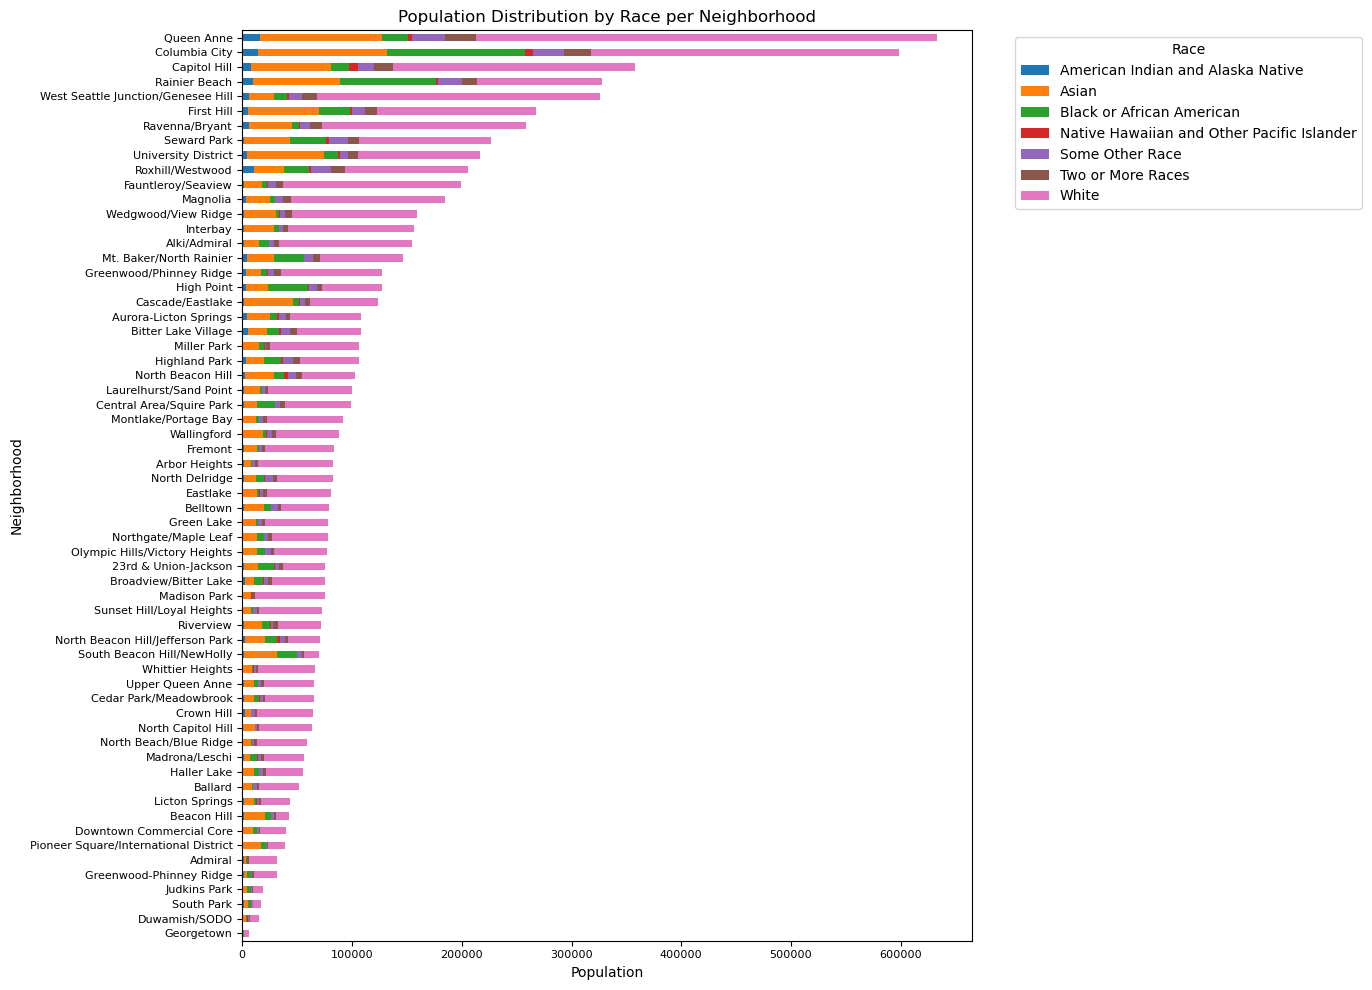

In [ ]:
# Grouping by Neighborhood and Race, and summing the populations
grouped = diff_language_census.groupby(['Neighborhood Name', 'Race'])['Population'].sum().unstack().fillna(0)

# Calculating the total population per neighborhood
grouped['Total'] = grouped.sum(axis=1)

# Sorting the neighborhoods by total population in descending order
grouped_sorted = grouped.sort_values(by='Total', ascending=True).drop(columns='Total')

# Plotting population distribution by race per neighborhood
grouped_sorted.plot(kind='barh', stacked=True, figsize=(14, 10))

plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('Population Distribution by Race per Neighborhood')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust font size of x-axis labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [35]:
# Example selection of columns (adjust based on your specific columns of interest)
columns_of_interest = [
    'Neighborhood Name',
    'Population Speaks a Language Other than English',
    'Population Speaks English Less than Very Well',
    'Households with Limited English',
    'Spanish Limited English Speaking Households',
    'Other Indo-European Languages Limited English Speaking Households',
    'Asian and Pacific Island Languages Limited English Speaking Households',
    'Other Languages Limited English Speaking Households'
]

# Subset the DataFrame with the selected columns
data_subset = diff_language_census[columns_of_interest]

# Aggregate by neighborhood
data_aggregated = data_subset.groupby('Neighborhood Name').sum().reset_index()


In [36]:
data_aggregated

,Neighborhood Name,Population Speaks a Language Other than English,Population Speaks English Less than Very Well,Households with Limited English,Spanish Limited English Speaking Households,Other Indo-European Languages Limited English Speaking Households,Asian and Pacific Island Languages Limited English Speaking Households,Other Languages Limited English Speaking Households
0,23rd & Union-Jackson,3059,1615,304,0,0,304,0
1,Admiral,21831,11457,3724,1748,0,1976,0
2,Alki/Admiral,35986,13186,6479,1083,456,2565,2375
3,Arbor Heights,35986,13186,6479,1083,456,2565,2375
4,Aurora-Licton Springs,45581,23009,8094,912,0,3952,3230
...,...,...,...,...,...,...,...,...
57,Upper Queen Anne,15181,3078,760,0,247,513,0
58,Wallingford,11609,3477,988,0,0,988,0
59,Wedgwood/View Ridge,24852,7980,1539,0,0,1235,304
60,West Seattle Junction/Genesee Hill,35986,13186,6479,1083,456,2565,2375


In [37]:
# Sort neighborhoods by a specific column (e.g., 'Population Speaks a Language Other than English')
data_aggregated_sorted = data_aggregated.sort_values(by='Population Speaks a Language Other than English', ascending=True)
# Calculate cumulative values for each category
data_aggregated_sorted['Speaks Another Language'] = data_aggregated_sorted['Population Speaks a Language Other than English']
data_aggregated_sorted['Speaks English Less than Very Well'] = data_aggregated_sorted['Population Speaks English Less than Very Well']
data_aggregated_sorted['Household with Limited English'] = data_aggregated_sorted[['Population Speaks a Language Other than English', 'Population Speaks English Less than Very Well']].sum(axis=1)

In [38]:
# Drop original columns after calculating cumulative values
data_aggregated_sorted = data_aggregated_sorted[['Neighborhood Name', 'Speaks Another Language', 'Speaks English Less than Very Well', 'Households with Limited English']]

In [ ]:
#data_aggregated_sorted = data_aggregated_sorted.drop(columns=['Beat'])

In [39]:
data_aggregated_sorted

,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English
0,23rd & Union-Jackson,3059,1615,304
34,Madrona/Leschi,6384,1216,133
13,Central Area/Squire Park,6384,1216,133
30,Judkins Park,6384,1216,133
45,Olympic Hills/Victory Heights,6954,1862,513
...,...,...,...,...
52,Seward Park,57266,27531,9272
48,Rainier Beach,57266,27531,9272
38,Mt. Baker/North Rainier,57266,27531,9272
40,North Beacon Hill,110922,70376,15390


In [ ]:
#data_aggregated_sorted.to_csv('language_per_neighborhood.csv', index=False)

In [ ]:
data_aggregated_sorted['Beat'] = data_aggregated_sorted['Neighborhood Name'].map(neighborhood_to_beat).fillna(data_aggregated_sorted['Neighborhood Name'])

In [ ]:
# Mapping of neighborhoods to beats
neighborhood_to_beat = {
    'Eastlake': 'E1',
    '23rd & Union-Jackson': 'C3',
    'North Beacon Hill': 'R1',
    'Columbia City': 'O2',
    'Admiral': 'W2',
    'Bitter Lake Village': 'N2',
    'Othello': 'O1',
    'Westwood-Highland Park': 'S3',
    'South Park': 'S1',
    'Madison-Miller': 'E3',
    'Lake City': 'N3',
    'Roosevelt': 'L2',
    'Wallingford': 'J1',
    'Rainier Beach': 'O1',
    'West Seattle Junction': 'W1',
    'Morgan Junction': 'W1',
    'Green Lake': 'F1',
    'Northgate': 'N3',
    'Fremont': 'F1',
    'Ballard': 'N1',
    'Mt Baker': 'K1',
    'South Lake Union': 'Q2',
    'University District': 'L1',
    'Uptown': 'K3',
    'Downtown': 'D1',
    'First Hill/Capitol Hill': 'C2',
    'Greater Duwamish': 'G1',
    'Council District 1': 'Q1',
    'Council District 2': 'O2',
    'Council District 3': 'C3',
    'Council District 4': 'L1',
    'Council District 5': 'N3',
    'Council District 6': 'N1',
    'Council District 7': 'D1',
    'Arbor Heights': 'W3',
    'Fauntleroy/Seaview': 'W3',
    'West Seattle Junction/Genesee Hill': 'W1',
    'Alki/Admiral': 'W2',
    'North Delridge': 'W2',
    'High Point': 'S2',
    'Riverview': 'S2',
    'Roxhill/Westwood': 'S3',
    'Highland Park': 'S3',
    'Georgetown': 'D3',
    'Duwamish/SODO': 'D3',
    'South Beacon Hill/NewHolly': 'R3',
    'Beacon Hill': 'R2',
    'North Beacon Hill/Jefferson Park': 'R1',
    'Seward Park': 'O3',
    'Mt. Baker/North Rainier': 'K1',
    'Madrona/Leschi': 'E3',
    'Judkins Park': 'C3',
    'Central Area/Squire Park': 'C3',
    'First Hill': 'C2',
    'Capitol Hill': 'C1',
    'North Capitol Hill': 'E3',
    'Miller Park': 'C1',
    'Madison Park': 'E2',
    'Montlake/Portage Bay': 'E2',
    'Ravenna/Bryant': 'U1',
    'Wedgwood/View Ridge': 'L3',
    'Laurelhurst/Sand Point': 'U2',
    'Northgate/Maple Leaf': 'N3',
    'Olympic Hills/Victory Heights': 'N3',
    'Cedar Park/Meadowbrook': 'N3',
    'Broadview/Bitter Lake': 'U3',
    'Licton Springs': 'N2',
    'Greenwood/Phinney Ridge': 'F2',
    'Haller Lake': 'N3',
    'North Beach/Blue Ridge': 'F3',
    'Whittier Heights': 'J3',
    'Sunset Hill/Loyal Heights': 'J2',
    'Cascade/Eastlake': 'E1',
    'Magnolia': 'Q3',
    'Interbay': 'Q2',
    'Queen Anne': 'Q1',
    'Belltown': 'D1',
    'Downtown Commercial Core': 'D1',
    'Pioneer Square/International District': 'D2',
    'Outside Villages': 'G2',
    'Aurora-Licton Springs': 'G3',
    'Greenwood-Phinney Ridge': 'F2',
    'Crown Hill': 'G3',
    'Upper Queen Anne': 'K3'
}


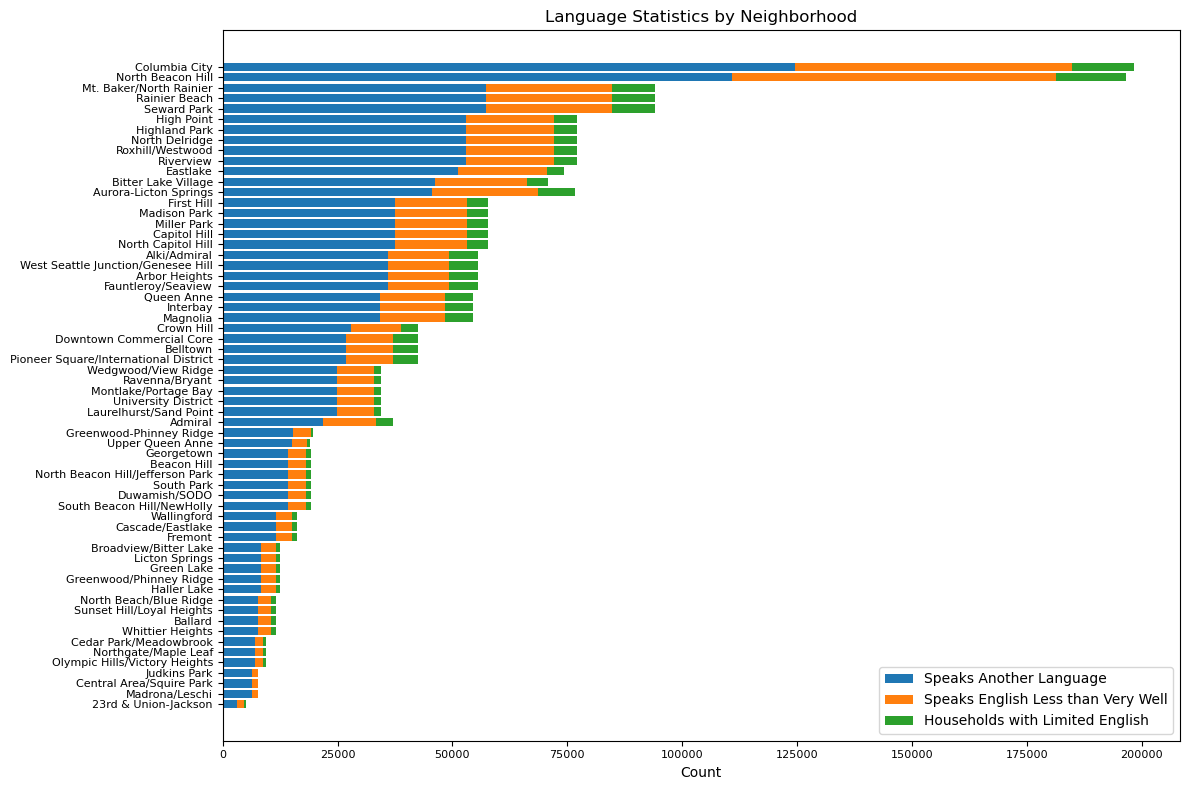

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_aggregated is already prepared as per the previous steps

# Sort neighborhoods by a specific column (e.g., 'Population Speaks a Language Other than English')
data_aggregated_sorted = data_aggregated.sort_values(by='Population Speaks a Language Other than English', ascending=True)

# Set the neighborhood names as x-axis labels
neighborhoods = data_aggregated_sorted['Neighborhood Name']

# Plotting each language-related variable
plt.figure(figsize=(12, 8))
plt.barh(neighborhoods, data_aggregated_sorted['Population Speaks a Language Other than English'], label='Speaks Another Language')
plt.barh(neighborhoods, data_aggregated_sorted['Population Speaks English Less than Very Well'], label='Speaks English Less than Very Well', left=data_aggregated_sorted['Population Speaks a Language Other than English'])
plt.barh(neighborhoods, data_aggregated_sorted['Households with Limited English'], label='Households with Limited English', left=data_aggregated_sorted[['Population Speaks a Language Other than English', 'Population Speaks English Less than Very Well']].sum(axis=1))
# Add more bars as needed for other variables

# Customize the plot
plt.xlabel('Count')
plt.title('Language Statistics by Neighborhood')
plt.legend()

# Adjust font size of x-axis labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
data_aggregated_sorted

,Neighborhood Name,Population Speaks a Language Other than English,Population Speaks English Less than Very Well,Households with Limited English,Spanish Limited English Speaking Households,Other Indo-European Languages Limited English Speaking Households,Asian and Pacific Island Languages Limited English Speaking Households,Other Languages Limited English Speaking Households
0,23rd & Union-Jackson,3059,1615,304,0,0,304,0
34,Madrona/Leschi,6384,1216,133,0,0,133,0
13,Central Area/Squire Park,6384,1216,133,0,0,133,0
30,Judkins Park,6384,1216,133,0,0,133,0
45,Olympic Hills/Victory Heights,6954,1862,513,19,0,494,0
...,...,...,...,...,...,...,...,...
52,Seward Park,57266,27531,9272,1444,1121,3287,3420
48,Rainier Beach,57266,27531,9272,1444,1121,3287,3420
38,Mt. Baker/North Rainier,57266,27531,9272,1444,1121,3287,3420
40,North Beacon Hill,110922,70376,15390,0,0,11533,3857


## crime data

In [41]:
crime_df = pd.read_csv('data/SPD_Crime_Data__2008-Present_20240704.csv')

In [42]:
south_beacon_hill = crime_df[crime_df['MCPP'] == 'SOUTH BEACON HILL']

In [ ]:
south_beacon_hill

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
164,2020-040450,12601902726,2020-02-02 02:13:00,NaN,2020-02-02 20:05:44,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,S,S,S1,SOUTH BEACON HILL,SWIFT AVE S / COVELLO DR S,-122.300364,47.539733
470,2020-035478,12500239437,2020-01-29 13:10:00,NaN,2020-01-29 21:58:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,S,S,S1,SOUTH BEACON HILL,86XX BLOCK OF BEACON AVE S,-122.287860,47.525595
593,2020-901370,12451632742,2019-04-24 16:30:00,12/24/2019 06:24:00 AM,2020-01-29 09:22:14,A,PROPERTY,FRAUD OFFENSES,Identity Theft,26F,S,S,S1,SOUTH BEACON HILL,S CLOVERDALE ST / M L KING JR WAY S,-122.279013,47.526117
619,2020-034421,12429598505,2020-01-28 17:18:00,NaN,2020-01-28 20:31:52,A,PROPERTY,ROBBERY,Robbery,120,S,S,S1,SOUTH BEACON HILL,30XX BLOCK OF S PORTLAND ST,-122.292106,47.533074
730,2020-901296,12338935651,2020-01-20 07:00:00,01/20/2020 09:30:00 AM,2020-01-28 06:14:34,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,S,S,S1,SOUTH BEACON HILL,37XX BLOCK OF S KENYON ST,-122.285043,47.531551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128530,2024-177003,57201336459,2024-06-28 23:18:00,06/29/2024 12:04:00 AM,2024-06-29 02:12:38,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,S,S,S1,SOUTH BEACON HILL,90XX BLOCK OF 36TH AVE S,-122.287165,47.522319
1128543,2024-934220,57221508785,2024-06-23 02:00:00,06/23/2024 02:30:00 AM,2024-07-01 08:20:00,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,S,S,S1,SOUTH BEACON HILL,92XX BLOCK OF 37TH AVE S,-122.285957,47.520564
1128637,2024-934138,57195866142,2024-06-27 19:00:00,06/28/2024 06:30:00 AM,2024-06-28 13:55:15,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,S,S,S1,SOUTH BEACON HILL,32XX BLOCK OF S PORTLAND ST,-122.289965,47.533064
1128691,2024-934235,57222565160,2024-06-28 19:30:00,06/28/2024 08:00:00 PM,2024-07-01 10:49:20,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,S,S,S1,SOUTH BEACON HILL,94XX BLOCK OF 37TH AVE S,-122.285970,47.517990


In [ ]:
new_hooly_hill = crime_df[crime_df['MCPP'] == 'NEW HOLLY']

In [43]:
# Convert necessary date columns to datetime type 
crime_df['Offense Start DateTime'] = pd.to_datetime(crime_df['Offense Start DateTime'])
crime_df['Report DateTime'] = pd.to_datetime(crime_df['Report DateTime'])

# Filter data for the years 2014-2022
df_filtered = crime_df[crime_df['Offense Start DateTime'].dt.year.between(2014, 2022)]

# Group by neighborhood columns and count unique Report Numbers
neighborhood_counts = df_filtered.groupby(['Precinct', 'Sector', 'Beat']).agg({'Report Number': pd.Series.nunique}).reset_index()

In [44]:
# Apply the mapping to the 'Beat' column
neighborhood_counts['Neighborhood Name'] = neighborhood_counts['Beat'].map(mapping).fillna(neighborhood_counts['Beat'])

NameError: name 'mapping' is not defined

In [ ]:
neighborhood_counts[neighborhood_counts['Beat'] == 'B1']
#print(neighborhood_counts[neighborhood_counts['Beat'] == 'B1'].sum())

,Precinct,Sector,Beat,Report Number,Neighborhood Name
1,E,B,B1,1,Bitter Lake Village
20,N,B,B1,14914,Bitter Lake Village


In [ ]:
# Group by 'Beat' and aggregate 'Report Number' and 'Neighborhood Name'
report_num_beat = neighborhood_counts.groupby('Beat').agg({
    'Report Number': 'sum',
    'Neighborhood Name': lambda x: ', '.join(x.unique())  # Combine unique neighborhood names into a comma-separated string
}).reset_index()

In [ ]:
report_num_beat

,Beat,Report Number,Neighborhood Name
0,99,99,Outside Villages
1,B1,14915,Bitter Lake Village
2,B2,15971,Fremont
3,B3,15203,Ballard
4,C1,10506,23rd & Union-Jackson
5,C2,8687,23rd & Union-Jackson
6,C3,8967,Capitol Hill
7,D1,13440,Downtown
8,D2,13525,First Hill
9,D3,12231,Pioneer Square/International District


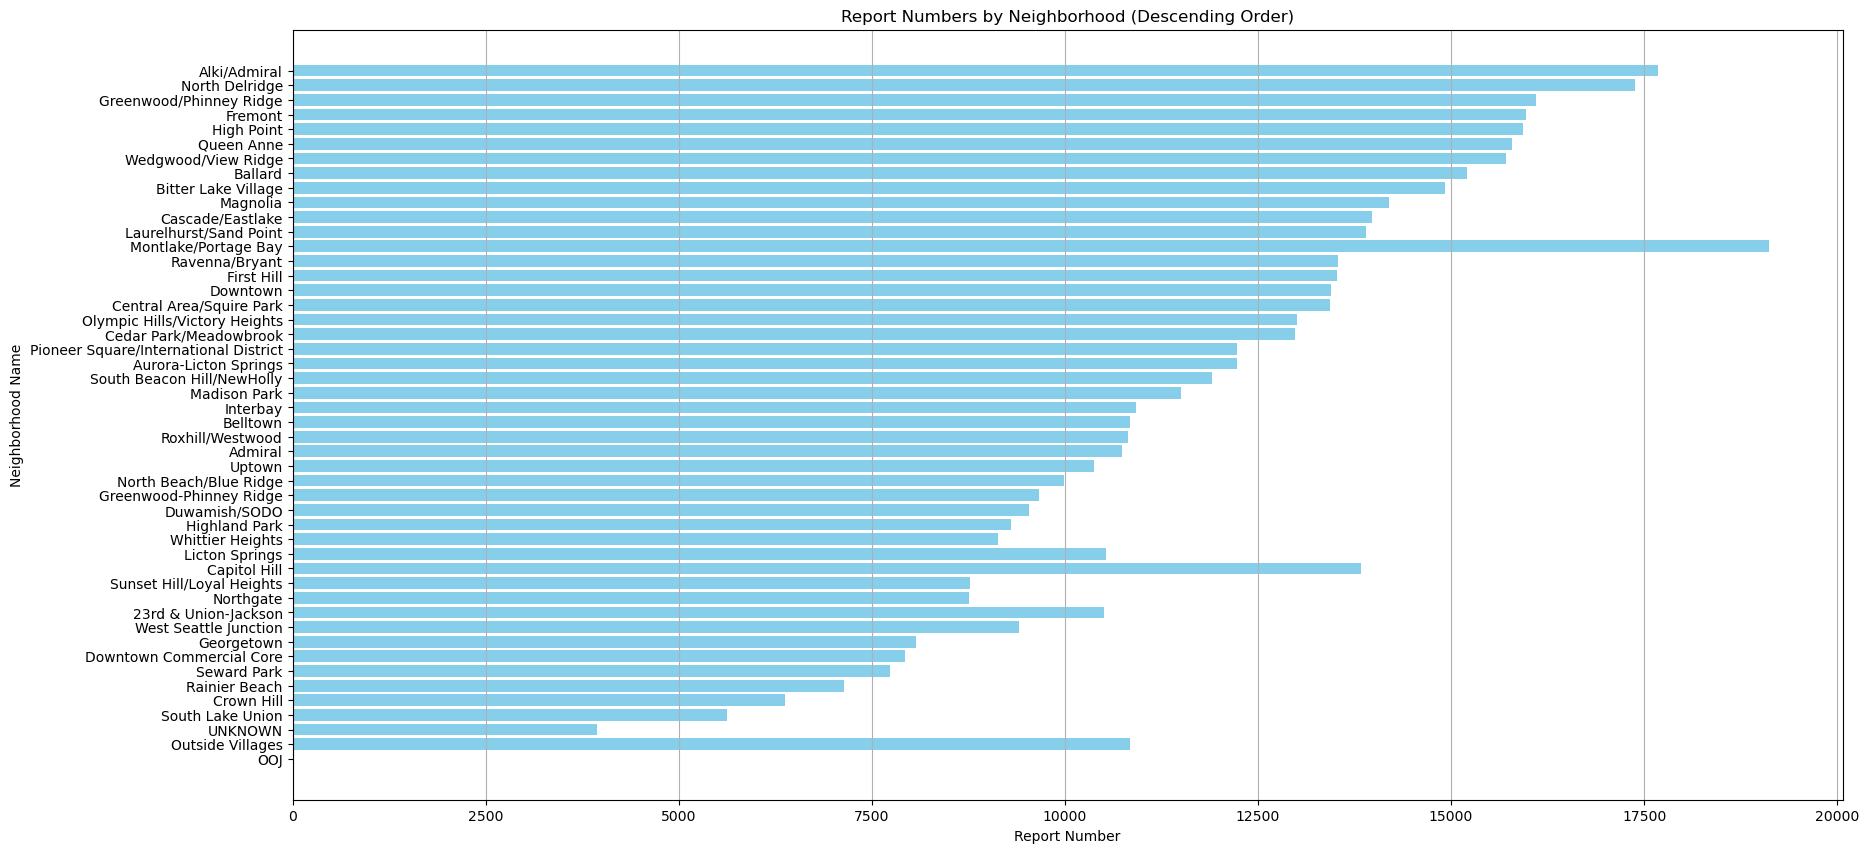

In [ ]:
# Sort the DataFrame by 'Report Number' in descending order
df_sorted = report_num_beat.sort_values(by='Report Number', ascending=True)

# Plotting the sorted data
plt.figure(figsize=(20, 10))
plt.barh(df_sorted['Neighborhood Name'], df_sorted['Report Number'], color='skyblue')
plt.xlabel('Report Number')
plt.ylabel('Neighborhood Name')
plt.title('Report Numbers by Neighborhood (Descending Order)')
plt.grid(axis='x')

# Show the plot
plt.show()

## 911 call data

In [59]:
call_data_911 = call_data_df[call_data_df['Call Type'] == '911']
call_data_911 = call_data_911.dropna()

In [60]:
mapping = {
    'Q3': 'Queen Anne',
    'C2': '23rd & Union-Jackson',
    'C3': 'Capitol Hill',
    'L1': 'Licton Springs',
    'Q1': 'Uptown',
    'J1': 'Highland Park',
    'J3': 'South Beacon Hill/NewHolly',
    'U1': 'Alki/Admiral',
    'B2': 'Fremont',
    'U3': 'North Delridge',
    'J2': 'Roxhill/Westwood',
    'F1': 'West Seattle Junction',
    'B3': 'Ballard',
    'O2': 'South Lake Union',
    'W3': 'Licton Springs',
    'L2': 'Greenwood/Phinney Ridge',
    'K2': 'Madison Park',
    'D1': 'Downtown',
    'B1': 'Bitter Lake Village',
    'G1': 'Rainier Beach',
    'N1': 'Northgate',
    'M1': 'Capitol Hill',
    'M2': 'Central Area/Squire Park',
    'S1': 'Seward Park',
    'N3': 'Olympic Hills/Victory Heights',
    'U2': 'High Point',
    'N2': 'Cedar Park/Meadowbrook',
    'E3': 'Ravenna/Bryant',
    'E2': 'Wedgwood/View Ridge',
    'L3': 'North Beach/Blue Ridge',
    'E1': 'Laurelhurst/Sand Point',
    'R3': 'Interbay',
    'S3': 'Whittier Heights',
    'O3': 'Crown Hill',
    'K3': 'Montlake/Portage Bay',
    'D2': 'First Hill',
    'Q2': 'Magnolia',
    'R2': 'Cascade/Eastlake',
    'S2': 'Sunset Hill/Loyal Heights',
    'R1': 'Belltown',
    'M3': 'Montlake/Portage Bay',
    'G3': 'Georgetown',
    'C1': '23rd & Union-Jackson',
    'G2': 'Duwamish/SODO',
    'F2': 'Admiral',
    'D3': 'Pioneer Square/International District',
    'F3': 'West Seattle Junction',
    'O1': 'Downtown Commercial Core',
    'K1': 'Outside Villages',
    'W2': 'Aurora-Licton Springs',
    'W1': 'Greenwood-Phinney Ridge',
    '99': 'Outside Villages',
    'H3': 'Capitol Hill',
    'SW': 'West Seattle Junction/Genesee Hill',
    'CTY': 'Central Area/Squire Park'
}


In [ ]:
reversed_mapping = {v: k for k, v in mapping.items()}

In [61]:
# Convert 'Original Time Queued' to datetime format
call_data_911['Original Time Queued'] = pd.to_datetime(call_data_911['Original Time Queued'], errors='coerce')

# Filter data for the years 2014-2022
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2022-12-31')
call_data_911 = call_data_911[(call_data_911['Original Time Queued'] >= start_date) & (call_data_911['Original Time Queued'] <= end_date)]


In [62]:
# Convert 'Original Time Queued' and 'Arrived Time' to datetime format
call_data_911['Arrived Time'] = pd.to_datetime(call_data_911['Arrived Time'])

# Calculate response time in seconds
call_data_911['Response Time in mins'] = (call_data_911['Arrived Time'] - call_data_911['Original Time Queued']).dt.total_seconds()/60.0

In [ ]:
call_data_911 = call_data_911.dropna()

In [63]:
# Group by year and neighborhood, calculate average response time
call_data_911['Year'] = call_data_911['Original Time Queued'].dt.year
average_response_time = call_data_911.groupby(['Year', 'Beat'])['Response Time in mins'].median().reset_index()

In [49]:
language_native = language_native.rename(columns={'Population': 'Speaking English'})

In [50]:
language_native

,Neighborhood Name,Speaking English
0,23rd & Union-Jackson,54776
1,Admiral,27920
2,Alki/Admiral,131880
3,Arbor Heights,71172
4,Aurora-Licton Springs,77952
...,...,...
57,Upper Queen Anne,51000
58,Wallingford,61112
59,Wedgwood/View Ridge,118688
60,West Seattle Junction/Genesee Hill,277488


In [51]:
speaking_data = data_aggregated_sorted.merge(language_native, on='Neighborhood Name')

In [52]:
speaking_data

,Neighborhood Name,Speaks Another Language,Speaks English Less than Very Well,Households with Limited English,Speaking English
0,23rd & Union-Jackson,3059,1615,304,54776
1,Madrona/Leschi,6384,1216,133,43788
2,Central Area/Squire Park,6384,1216,133,78504
3,Judkins Park,6384,1216,133,12436
4,Olympic Hills/Victory Heights,6954,1862,513,56076
...,...,...,...,...,...
57,Seward Park,57266,27531,9272,158292
58,Rainier Beach,57266,27531,9272,213480
59,Mt. Baker/North Rainier,57266,27531,9272,107694
60,North Beacon Hill,110922,70376,15390,63948


In [46]:
speaking_data.to_csv('speaking_data.csv')

In [53]:
speaking_data['total population'] = speaking_data['Speaks Another Language'] + speaking_data['Speaks English Less than Very Well'] + speaking_data['Households with Limited English'] + speaking_data['Speaking English']

In [54]:
# Calculate the percentages
speaking_data['Speaks Another Language (%)'] = (speaking_data['Speaks Another Language'] / speaking_data['total population']) * 100
speaking_data['Speaks English Less than Very Well (%)'] = (speaking_data['Speaks English Less than Very Well'] / speaking_data['total population']) * 100
speaking_data['Households with Limited English (%)'] = (speaking_data['Households with Limited English'] / speaking_data['total population']) * 100
speaking_data['Speaks English (%)'] = (speaking_data['Speaking English'] / speaking_data['total population']) * 100

# Drop the original count columns if you no longer need them
speaking_data = speaking_data.drop(columns=['Speaks Another Language', 'Speaks English Less than Very Well', 'Households with Limited English', 'Speaking English'])

In [ ]:
average_response_time.to_csv('average_response_time.csv')

In [65]:
average_response_time

,Year,Beat,Response Time in mins
0,2014,99,22.391667
1,2014,B1,19.300000
2,2014,B2,18.683333
3,2014,B3,19.816667
4,2014,C1,10.375000
...,...,...,...
466,2022,U2,18.991667
467,2022,U3,22.166667
468,2022,W1,18.966667
469,2022,W2,17.008333


In [67]:
reponse_speaking = average_response_time.merge(speaking_data, on='Neighborhood Name')

In [69]:
reponse_speaking_2022 = reponse_speaking[reponse_speaking['Year'] == 2022 ]

In [70]:
reponse_speaking_2022

,Year,Beat,Response Time in mins,Neighborhood Name,total population,Speaks Another Language (%),Speaks English Less than Very Well (%),Households with Limited English (%),Speaks English (%)
8,2022,B1,29.566667,Bitter Lake Village,146744,31.553590,13.504470,3.211034,51.730906
17,2022,B2,26.191667,Fremont,82714,14.035109,4.203641,1.194477,80.566772
26,2022,B3,25.633333,Ballard,48714,15.640268,6.123496,2.028164,76.208072
43,2022,C1,18.858333,23rd & Union-Jackson,59754,5.119323,2.702748,0.508753,91.669177
44,2022,C2,23.083333,23rd & Union-Jackson,59754,5.119323,2.702748,0.508753,91.669177
62,2022,C3,17.341667,Capitol Hill,310783,12.043773,5.062053,1.461148,81.433026
63,2022,H3,9.583333,Capitol Hill,310783,12.043773,5.062053,1.461148,81.433026
64,2022,M1,10.683333,Capitol Hill,310783,12.043773,5.062053,1.461148,81.433026
73,2022,D2,16.741667,First Hill,236431,15.831257,6.653950,1.920645,75.594148
82,2022,D3,21.641667,Pioneer Square/International District,62462,42.950914,16.517242,8.486760,32.045083


In [164]:
reponse_speaking.drop(columns=['Population Speaks a Language Other than English','Population Speaks English Less than Very Well','Households with Limited English','Spanish Limited English Speaking Households','Other Indo-European Languages Limited English Speaking Households','Asian and Pacific Island Languages Limited English Speaking Households','Other Languages Limited English Speaking Households'])

,Year,Beat,Response Time in mins,Neighborhood Name,total population,Speaks Another Language (%),Speaks English Less than Very Well (%),Households with Limited English (%),Speaks English (%)
0,2014,B1,19.300000,Bitter Lake Village,146744,31.553590,13.504470,3.211034,51.730906
1,2015,B1,23.283333,Bitter Lake Village,146744,31.553590,13.504470,3.211034,51.730906
2,2016,B1,20.533333,Bitter Lake Village,146744,31.553590,13.504470,3.211034,51.730906
3,2017,B1,17.050000,Bitter Lake Village,146744,31.553590,13.504470,3.211034,51.730906
4,2018,B1,21.283333,Bitter Lake Village,146744,31.553590,13.504470,3.211034,51.730906
...,...,...,...,...,...,...,...,...,...
394,2019,W2,12.183333,Aurora-Licton Springs,154636,29.476319,14.879459,5.234227,50.409995
395,2020,W2,12.225000,Aurora-Licton Springs,154636,29.476319,14.879459,5.234227,50.409995
396,2021,W2,15.541667,Aurora-Licton Springs,154636,29.476319,14.879459,5.234227,50.409995
397,2022,W2,17.008333,Aurora-Licton Springs,154636,29.476319,14.879459,5.234227,50.409995


In [74]:
# Select relevant numerical columns for correlation analysis
numerical_cols = ['Response Time in mins', 'total population', 'Speaks Another Language (%)', 
                  'Speaks English Less than Very Well (%)', 'Households with Limited English (%)', 
                  'Speaks English (%)']

# Calculate correlation matrix
correlation_matrix = reponse_speaking[numerical_cols].corr()

In [75]:
# Select relevant numerical columns for correlation analysis
numerical_cols = ['Response Time in mins', 'total population', 'Speaks Another Language (%)', 
                  'Speaks English Less than Very Well (%)', 'Households with Limited English (%)', 
                  'Speaks English (%)']

# Calculate correlation matrix
correlation_matrix_1 = reponse_speaking_2022[numerical_cols].corr()

In [101]:
reponse_speaking_2022.to_csv('reponse_speaking_2022.csv')

In [76]:
correlation_matrix_1

,Response Time in mins,total population,Speaks Another Language (%),Speaks English Less than Very Well (%),Households with Limited English (%),Speaks English (%)
Response Time in mins,1.000000,-0.218074,0.183365,0.151914,0.111477,-0.174132
total population,-0.218074,1.000000,-0.301257,-0.184173,-0.132431,0.264412
Speaks Another Language (%),0.183365,-0.301257,1.000000,0.919603,0.754630,-0.987872
Speaks English Less than Very Well (%),0.151914,-0.184173,0.919603,1.000000,0.878140,-0.966403
Households with Limited English (%),0.111477,-0.132431,0.754630,0.878140,1.000000,-0.836881
Speaks English (%),-0.174132,0.264412,-0.987872,-0.966403,-0.836881,1.000000


In [170]:
correlation_matrix

,Response Time in mins,total population,Speaks Another Language (%),Speaks English Less than Very Well (%),Households with Limited English (%),Speaks English (%)
Response Time in mins,1.000000,0.022895,0.024994,0.016665,0.013695,-0.022571
total population,0.022895,1.000000,-0.288641,-0.172196,-0.118993,0.251455
Speaks Another Language (%),0.024994,-0.288641,1.000000,0.919126,0.752747,-0.987766
Speaks English Less than Very Well (%),0.016665,-0.172196,0.919126,1.000000,0.877026,-0.966241
Households with Limited English (%),0.013695,-0.118993,0.752747,0.877026,1.000000,-0.835618
Speaks English (%),-0.022571,0.251455,-0.987766,-0.966241,-0.835618,1.000000


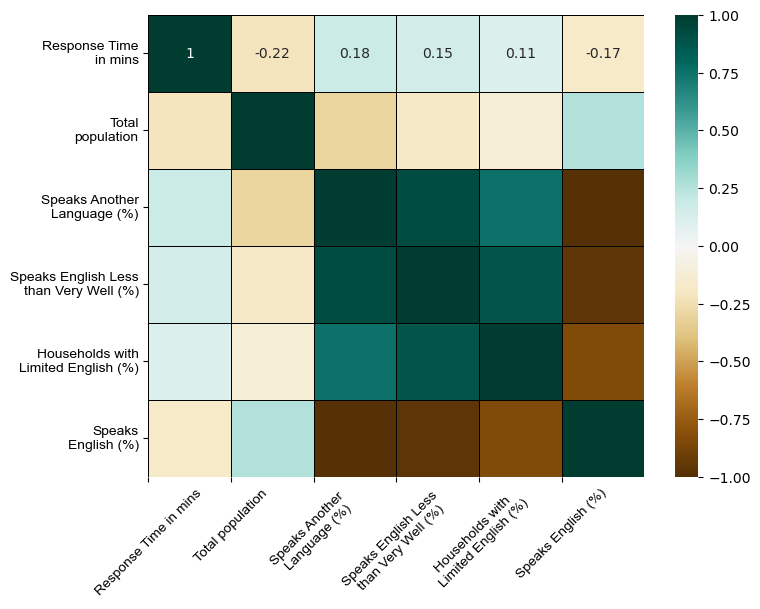

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix_1, annot=True, cmap='BrBG', vmin=-1, vmax=1, 
                 linewidths=0.5, linecolor='black')

# Customize tick labels

x_labels = ['Response Time in mins', 'Total population',
            'Speaks Another \nLanguage (%)', 
            'Speaks English Less \nthan Very Well (%)', 
            'Households with \nLimited English (%)', 
            'Speaks English (%)']

ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, fontsize=10, family='Arial', ha='center', rotation=45)

# Customize y-axis tick labels
y_labels = ['Response Time\nin mins', 'Total\npopulation',
            'Speaks Another\nLanguage (%)', 
            'Speaks English Less\nthan Very Well (%)', 
            'Households with\nLimited English (%)', 
            'Speaks\nEnglish (%)']

ax.set_yticks(np.arange(len(y_labels)) + 0.5)  # Offset ticks to match heatmap cells
ax.set_yticklabels(y_labels, fontsize=10, family='Arial', va='center')


plt.show()


In [136]:
#Speaks Another Language (%) 2022
from scipy import stats

# Calculate the mean of 'Speaks Another Language (%)'
median_language_barrier = reponse_speaking_2022['Speaks Another Language (%)'].mean()

# Create groups based on the median
group1 = reponse_speaking_2022[reponse_speaking_2022['Speaks Another Language (%)'] <= median_language_barrier]
group2 = reponse_speaking_2022[reponse_speaking_2022['Speaks Another Language (%)'] > median_language_barrier]

from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(group1['Response Time in mins'], group2['Response Time in mins'])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


T-statistic: -0.636
P-value: 0.528


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWar

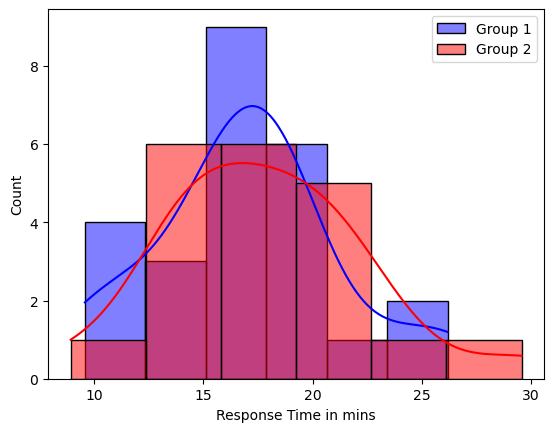

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of response times for both groups
sns.histplot(group1['Response Time in mins'], kde=True, color='blue', label='Group 1')
sns.histplot(group2['Response Time in mins'], kde=True, color='red', label='Group 2')
plt.legend()
plt.show()


In [138]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(group1['Response Time in mins'], group2['Response Time in mins'])

print(f"U-statistic: {u_stat:.3f}")
print(f"P-value: {p_value:.3f}")


U-statistic: 227.000
P-value: 0.607


In [98]:
#Speaks English Less than Very Well (%) 2022
from scipy import stats

# Calculate the mean of 'Speaks Another Language (%)'
median_language_barrier = reponse_speaking_2022['Speaks English Less than Very Well (%)'].mean()

# Create groups based on the median
group1 = reponse_speaking_2022[reponse_speaking_2022['Speaks English Less than Very Well (%)'] <= median_language_barrier]
group2 = reponse_speaking_2022[reponse_speaking_2022['Speaks English Less than Very Well (%)'] > median_language_barrier]

from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(group1['Response Time in mins'], group2['Response Time in mins'])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -1.370
P-value: 0.178


In [134]:
#Households with Limited English (%)' 2022
from scipy import stats

# Calculate the mean of 'Speaks Another Language (%)'
median_language_barrier = reponse_speaking_2022['Households with Limited English (%)'].median()

# Create groups based on the median
group1 = reponse_speaking_2022[reponse_speaking_2022['Households with Limited English (%)'] <= median_language_barrier]
group2 = reponse_speaking_2022[reponse_speaking_2022['Households with Limited English (%)'] > median_language_barrier]

from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(group1['Response Time in mins'], group2['Response Time in mins'])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -1.395
P-value: 0.170


In [100]:
#Speaks English (%) 2022

from scipy import stats

# Calculate the mean of 'Speaks Another Language (%)'
median_language_barrier = reponse_speaking_2022['Speaks English (%)'].mean()

# Create groups based on the median
group1 = reponse_speaking_2022[reponse_speaking_2022['Speaks English (%)'] <= median_language_barrier]
group2 = reponse_speaking_2022[reponse_speaking_2022['Speaks English (%)'] > median_language_barrier]

from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(group1['Response Time in mins'], group2['Response Time in mins'])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 0.886
P-value: 0.380


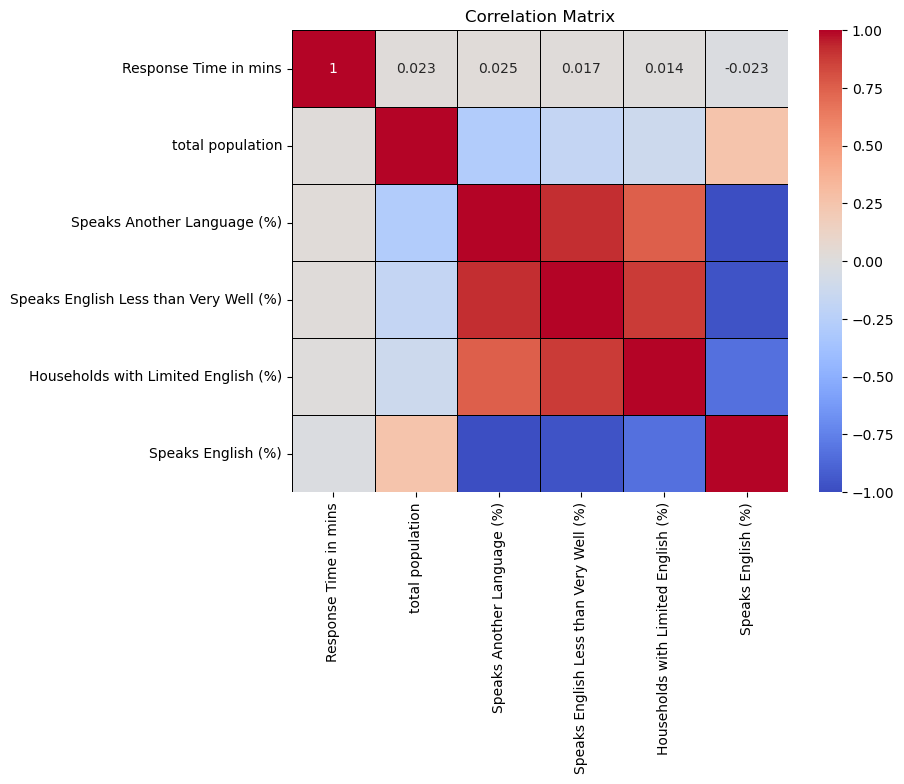

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [66]:
average_response_time['Neighborhood Name'] = average_response_time['Beat'].map(mapping).fillna(average_response_time['Beat'])

In [ ]:
average_response_time['total population'] = average_response_time['Speaks Another Language'] + average_response_time['Speaks English Less than Very Well'] + average_response_time['Households with Limited English'] + average_response_time['Speaks English']

In [163]:
average_response_time

,Year,Beat,Response Time in mins,Neighborhood Name,Population Speaks a Language Other than English,Population Speaks English Less than Very Well,Households with Limited English,Spanish Limited English Speaking Households,Other Indo-European Languages Limited English Speaking Households,Asian and Pacific Island Languages Limited English Speaking Households,Other Languages Limited English Speaking Households
0,2014,B1,19.300000,Bitter Lake Village,46303,19817,4712,2508,0,1691,513
1,2015,B1,23.283333,Bitter Lake Village,46303,19817,4712,2508,0,1691,513
2,2016,B1,20.533333,Bitter Lake Village,46303,19817,4712,2508,0,1691,513
3,2017,B1,17.050000,Bitter Lake Village,46303,19817,4712,2508,0,1691,513
4,2018,B1,21.283333,Bitter Lake Village,46303,19817,4712,2508,0,1691,513
...,...,...,...,...,...,...,...,...,...,...,...
394,2019,W2,12.183333,Aurora-Licton Springs,45581,23009,8094,912,0,3952,3230
395,2020,W2,12.225000,Aurora-Licton Springs,45581,23009,8094,912,0,3952,3230
396,2021,W2,15.541667,Aurora-Licton Springs,45581,23009,8094,912,0,3952,3230
397,2022,W2,17.008333,Aurora-Licton Springs,45581,23009,8094,912,0,3952,3230


In [142]:
average_response_time = average_response_time.merge(data_aggregated_sorted,on='Neighborhood Name')

In [ ]:
# Calculate the percentages
average_response_time['Speaks Another Language (%)'] = (average_response_time['Speaks Another Language'] / average_response_time['total population']) * 100
average_response_time['Speaks English Less than Very Well (%)'] = (average_response_time['Speaks English Less than Very Well'] / average_response_time['total population']) * 100
average_response_time['Households with Limited English (%)'] = (average_response_time['Households with Limited English'] / average_response_time['total population']) * 100
#average_response_time['Speaks English (%)'] = (average_response_time['Speaks English'] / average_response_time['total population']) * 100

# Drop the original count columns if you no longer need them
#average_response_time_final = average_response_time.drop(columns=['Speaks Another Language', 'Speaks English Less than Very Well', 'Households with Limited English', 'Speaks English'])

In [ ]:
the_averages_response_time_2022 = the_averages_response_time_2022.merge(language_native,on='Neighborhood Name')
the_averages_response_time_2022 = the_averages_response_time_2022.rename(columns={'Population': 'Speaks English'})
the_averages_response_time_2022['total population'] = the_averages_response_time_2022['Speaks Another Language'] + the_averages_response_time_2022['Speaks English Less than Very Well'] + the_averages_response_time_2022['Households with Limited English'] + the_averages_response_time_2022['Speaks English']

In [ ]:
the_averages_response_time_2022.describe()

In [ ]:
# Calculate the percentages
the_averages_response_time_2022['Speaks Another Language (%)'] = (the_averages_response_time_2022['Speaks Another Language'] / the_averages_response_time_2022['total population']) * 100
the_averages_response_time_2022['Speaks English Less than Very Well (%)'] = (the_averages_response_time_2022['Speaks English Less than Very Well'] / the_averages_response_time_2022['total population']) * 100
the_averages_response_time_2022['Households with Limited English (%)'] = (the_averages_response_time_2022['Households with Limited English'] / the_averages_response_time_2022['total population']) * 100
the_averages_response_time_2022['Speaks English (%)'] = (the_averages_response_time_2022['Speaks English'] / the_averages_response_time_2022['total population']) * 100

# Drop the original count columns if you no longer need them
the_averages_response_time_2022 = the_averages_response_time_2022.drop(columns=['Speaks Another Language', 'Speaks English Less than Very Well', 'Households with Limited English', 'Speaks English'])

In [ ]:
the_averages_response_time_2022.info()

In [ ]:
the_averages_response_time_2022.describe()

In [ ]:
# Correlation matrix
correlation_matrix = the_averages_response_time_2022[['Response Time in mins', 'Speaks Another Language (%)', 'Speaks English Less than Very Well (%)', 'Households with Limited English (%)', 'Speaks English (%)']].corr()
correlation_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = the_averages_response_time_2022[['Response Time in mins', 'Speaks Another Language (%)', 'Speaks English Less than Very Well (%)', 'Households with Limited English (%)', 'Speaks English (%)']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()


## merge language data (demographic factor) with 911 call data

In [ ]:
#merge_call_911_language = call_data_911.merge(diff_language_census, on='Neighborhood Name')

In [ ]:
#merge_call_911_language = merge_call_911_language.dropna(inplace=True)

In [ ]:
merge_911_language = pd.merge(call_data_911,diff_language_census,on='Neighborhood Name', how='left')

In [ ]:
merge_911_language.info()

## HYpothesis testing

In [ ]:
# Define threshold based on your criteria (e.g., median, percentile, absolute value)
#threshold = merge_911_language['Population Speaks a Language Other than English'].median()
#threshold

In [ ]:
# Define groups based on linguistic diversity
#high_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] > threshold]
#low_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] <= threshold]


In [ ]:

# Assuming merge_911_language is your merged dataframe
# Convert 'Original Time Queued' and 'Arrived Time' to datetime format
merge_911_language['Original Time Queued'] = pd.to_datetime(merge_911_language['Original Time Queued'])
merge_911_language['Arrived Time'] = pd.to_datetime(merge_911_language['Arrived Time'])

# Calculate response time in minutes
merge_911_language['Response Time'] = (merge_911_language['Arrived Time'] - merge_911_language['Original Time Queued']).dt.total_seconds() / 60.0

# Now, define threshold based on your criteria (e.g., median, percentile, absolute value)
threshold = merge_911_language['Population Speaks a Language Other than English'].median()

# Define groups based on linguistic diversity
high_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] > threshold]
low_diversity = merge_911_language[merge_911_language['Population Speaks a Language Other than English'] <= threshold]

# Extract response times in minutes for each group
response_times_high = high_diversity['Response Time']
response_times_low = low_diversity['Response Time']

# Perform t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(response_times_high, response_times_low, equal_var=False)  # Assuming unequal variances

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in response times between neighborhoods with high and low linguistic diversity.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in response times between neighborhoods with high and low linguistic diversity.")


In [ ]:
print(p_value)
print(t_stat)

### Combine response times 

## plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns